In [ ]:
! pip install mahotas

     |████████████████████████████████| 5.7 MB 4.0 MB/s 


In [ ]:
from mahotas.features import surf

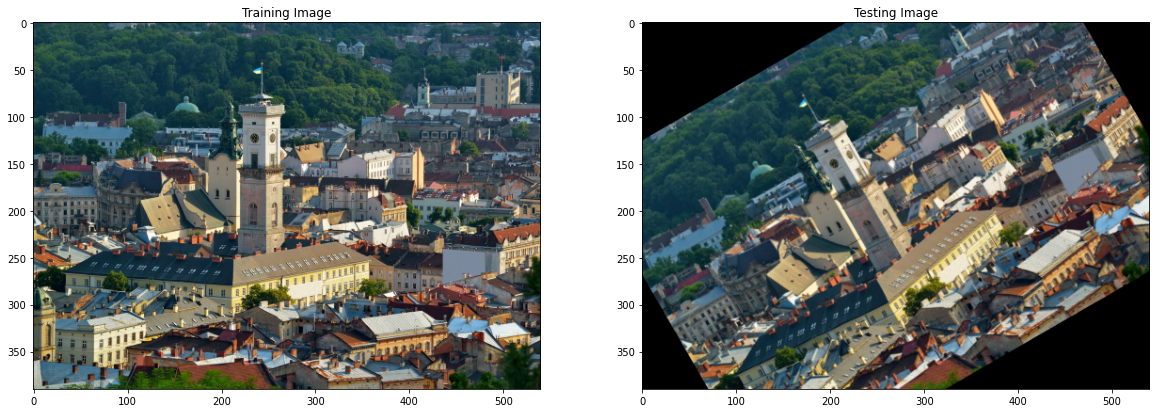

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load the image
image1 = cv2.imread('lviv.jpg')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = training_image.copy()
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

In [ ]:
npoints1 = surf.surf(training_gray)
npoints2 = surf.surf(test_gray)

In [ ]:
orb = cv2.ORB_create(100)

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(training_gray,None)
kp2, des2 = orb.detectAndCompute(test_gray,None)

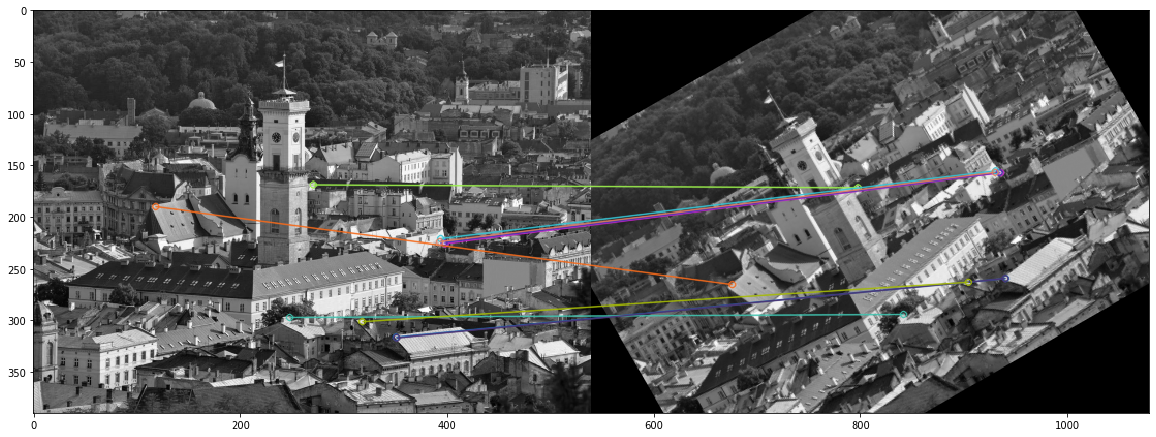

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 =cv2.drawMatches(training_gray,kp1,test_gray,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize = (20,40))
plt.imshow(img3, interpolation='nearest')

In [ ]:
def matcher(desc1, desc2):
  matches = []
  for i in range(len(desc1)):
    for j in range(len(desc2)):
      dst = euclidean_distances(desc1[i].reshape(1,-1), desc2[j].reshape(1,-1))
      if dst < 60:
        matches.append(cv2.DMatch(_queryIdx=i, _trainIdx=j, _imgIdx=0,_distance=dst))
  return matches

In [ ]:
res = matcher(npoints1[:, 6:],npoints2[:, 6:])

In [ ]:
kp1_, kp2_ = [], []

for i, j in zip(range(len(npoints1)), range(len(npoints2))):
  y,x,scale,_,_,angle = npoints1[i][:6]
  kp1_.append(cv2.KeyPoint(x, y, scale, angle))
  y,x,scale,_,_,angle = npoints2[j][:6]
  kp2_.append(cv2.KeyPoint(x, y, scale, angle))

In [ ]:
res = sorted(res, key = lambda x:x.distance)

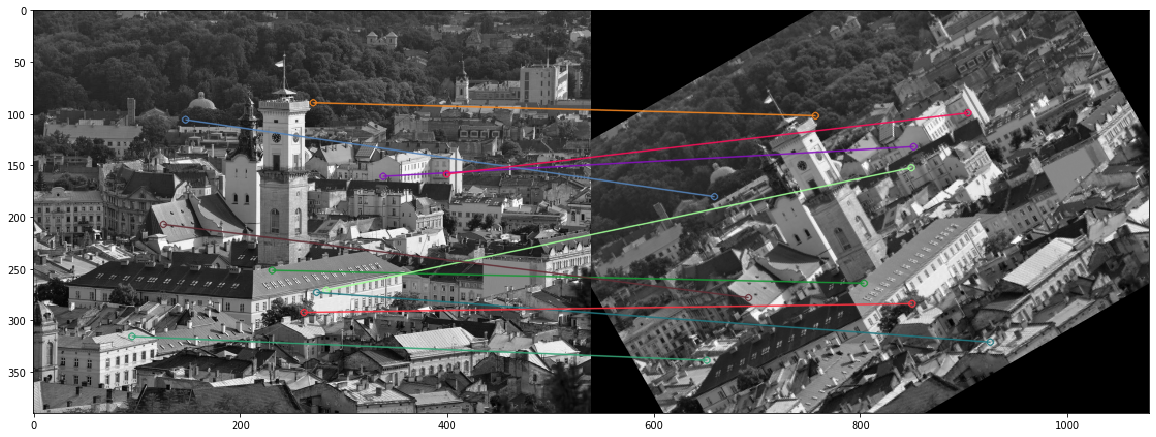

In [ ]:
img3 =cv2.drawMatches(training_gray,kp1_,test_gray,kp2_,res[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize = (20,40))
plt.imshow(img3, interpolation='nearest')